## Imports

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np

## Important Funtions

In [13]:
def calculate_area(path_track, path_seqinfo):
    track_file = open(path_track)
    seqinfo_file = open(path_seqinfo)
    data_track = json.load(track_file)
    data_seqinfo = json.load(seqinfo_file)
    img_width = data_seqinfo['imWidth']
    img_height = data_seqinfo['imWidth']
    area = {}
    all_areas_list = []
    for track in data_track:
        area_list = []
        frames = track['frames']
        for frame in frames:
            rect = frame['rect']
            top_left = rect['tl']
            bottom_right = rect['br']
            x1, y1 = top_left['x'], top_left['y']
            x2, y2 = bottom_right['x'], bottom_right['y']
            width = x2 - x1
            height = y2 -y1
            calc_area = height * width * img_width * img_height
            area_list.append(calc_area)
            all_areas_list.append(calc_area)
        area[track['track id']] = area_list
    return area, all_areas_list

def plot_trackID_area(trackid_area):
    fig = plt.figure(figsize =(12, 6), dpi=300)
    ax = fig.add_subplot(111)
    limit = len(trackid_area.keys())
    step_limit = 25
    ax.set_xticks(np.arange(0, limit, step=limit//step_limit))
    ax.set_xlim(right=limit)
    ax.set_ylabel('Area', fontsize=16)
    ax.set_xlabel('Track IDs', fontsize=16)
    for key, data_list in trackid_area.items():
        data_len = len(data_list)
        key = [key] * data_len
        ax.plot(key, data_list)
    fig.savefig('area.png')
    plt.show()
    
def bbox_distribution(all_areas):
    bins = [96*96, 256*256, 512*512, 1024*1024]
    a = {}
    a['small(96)'] = len([i for i in all_areas if i < bins[0]])
    a['96x96'] = len([i for i in all_areas if i > bins[0] and i < bins[1]])
    a['256x256'] = len([i for i in all_areas if i > bins[1] and i < bins[2]])
    a['512x512'] = len([i for i in all_areas if i > bins[2] and i < bins[3]])
    a['big(1024)'] = len([i for i in all_areas if i > bins[3]])
    plt.xlabel("BBox Size", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.bar(list(a.keys()), a.values(), color='g')
    plt.show()

## Claculate Area

In [20]:
# Enter sequence path 
path = '05_Basketball_Court'#'04_Primary_School'#'01_University_Canteen' ##'07_University_Campus'#'10_Huaqiangbei'
path_track = path + '/tracks.json'
path_seqinfo = path + '/seqinfo.json'
trackid_area, all_areas = calculate_area(path_track, path_seqinfo)
all_area_array = np.array(all_areas)
mean = np.mean(all_area_array)
std = np.std(all_area_array)
median = np.median(all_area_array)
print("Mean : {}\nMedian : {}\nSTD : {}".format(mean, median, std))

Mean : 465468.8204076439
Median : 423644.06315550266
STD : 206601.10591008086


## Tracking ID Area  

This graph shows the varying size of bbox of each tracking ID over the whole sequence

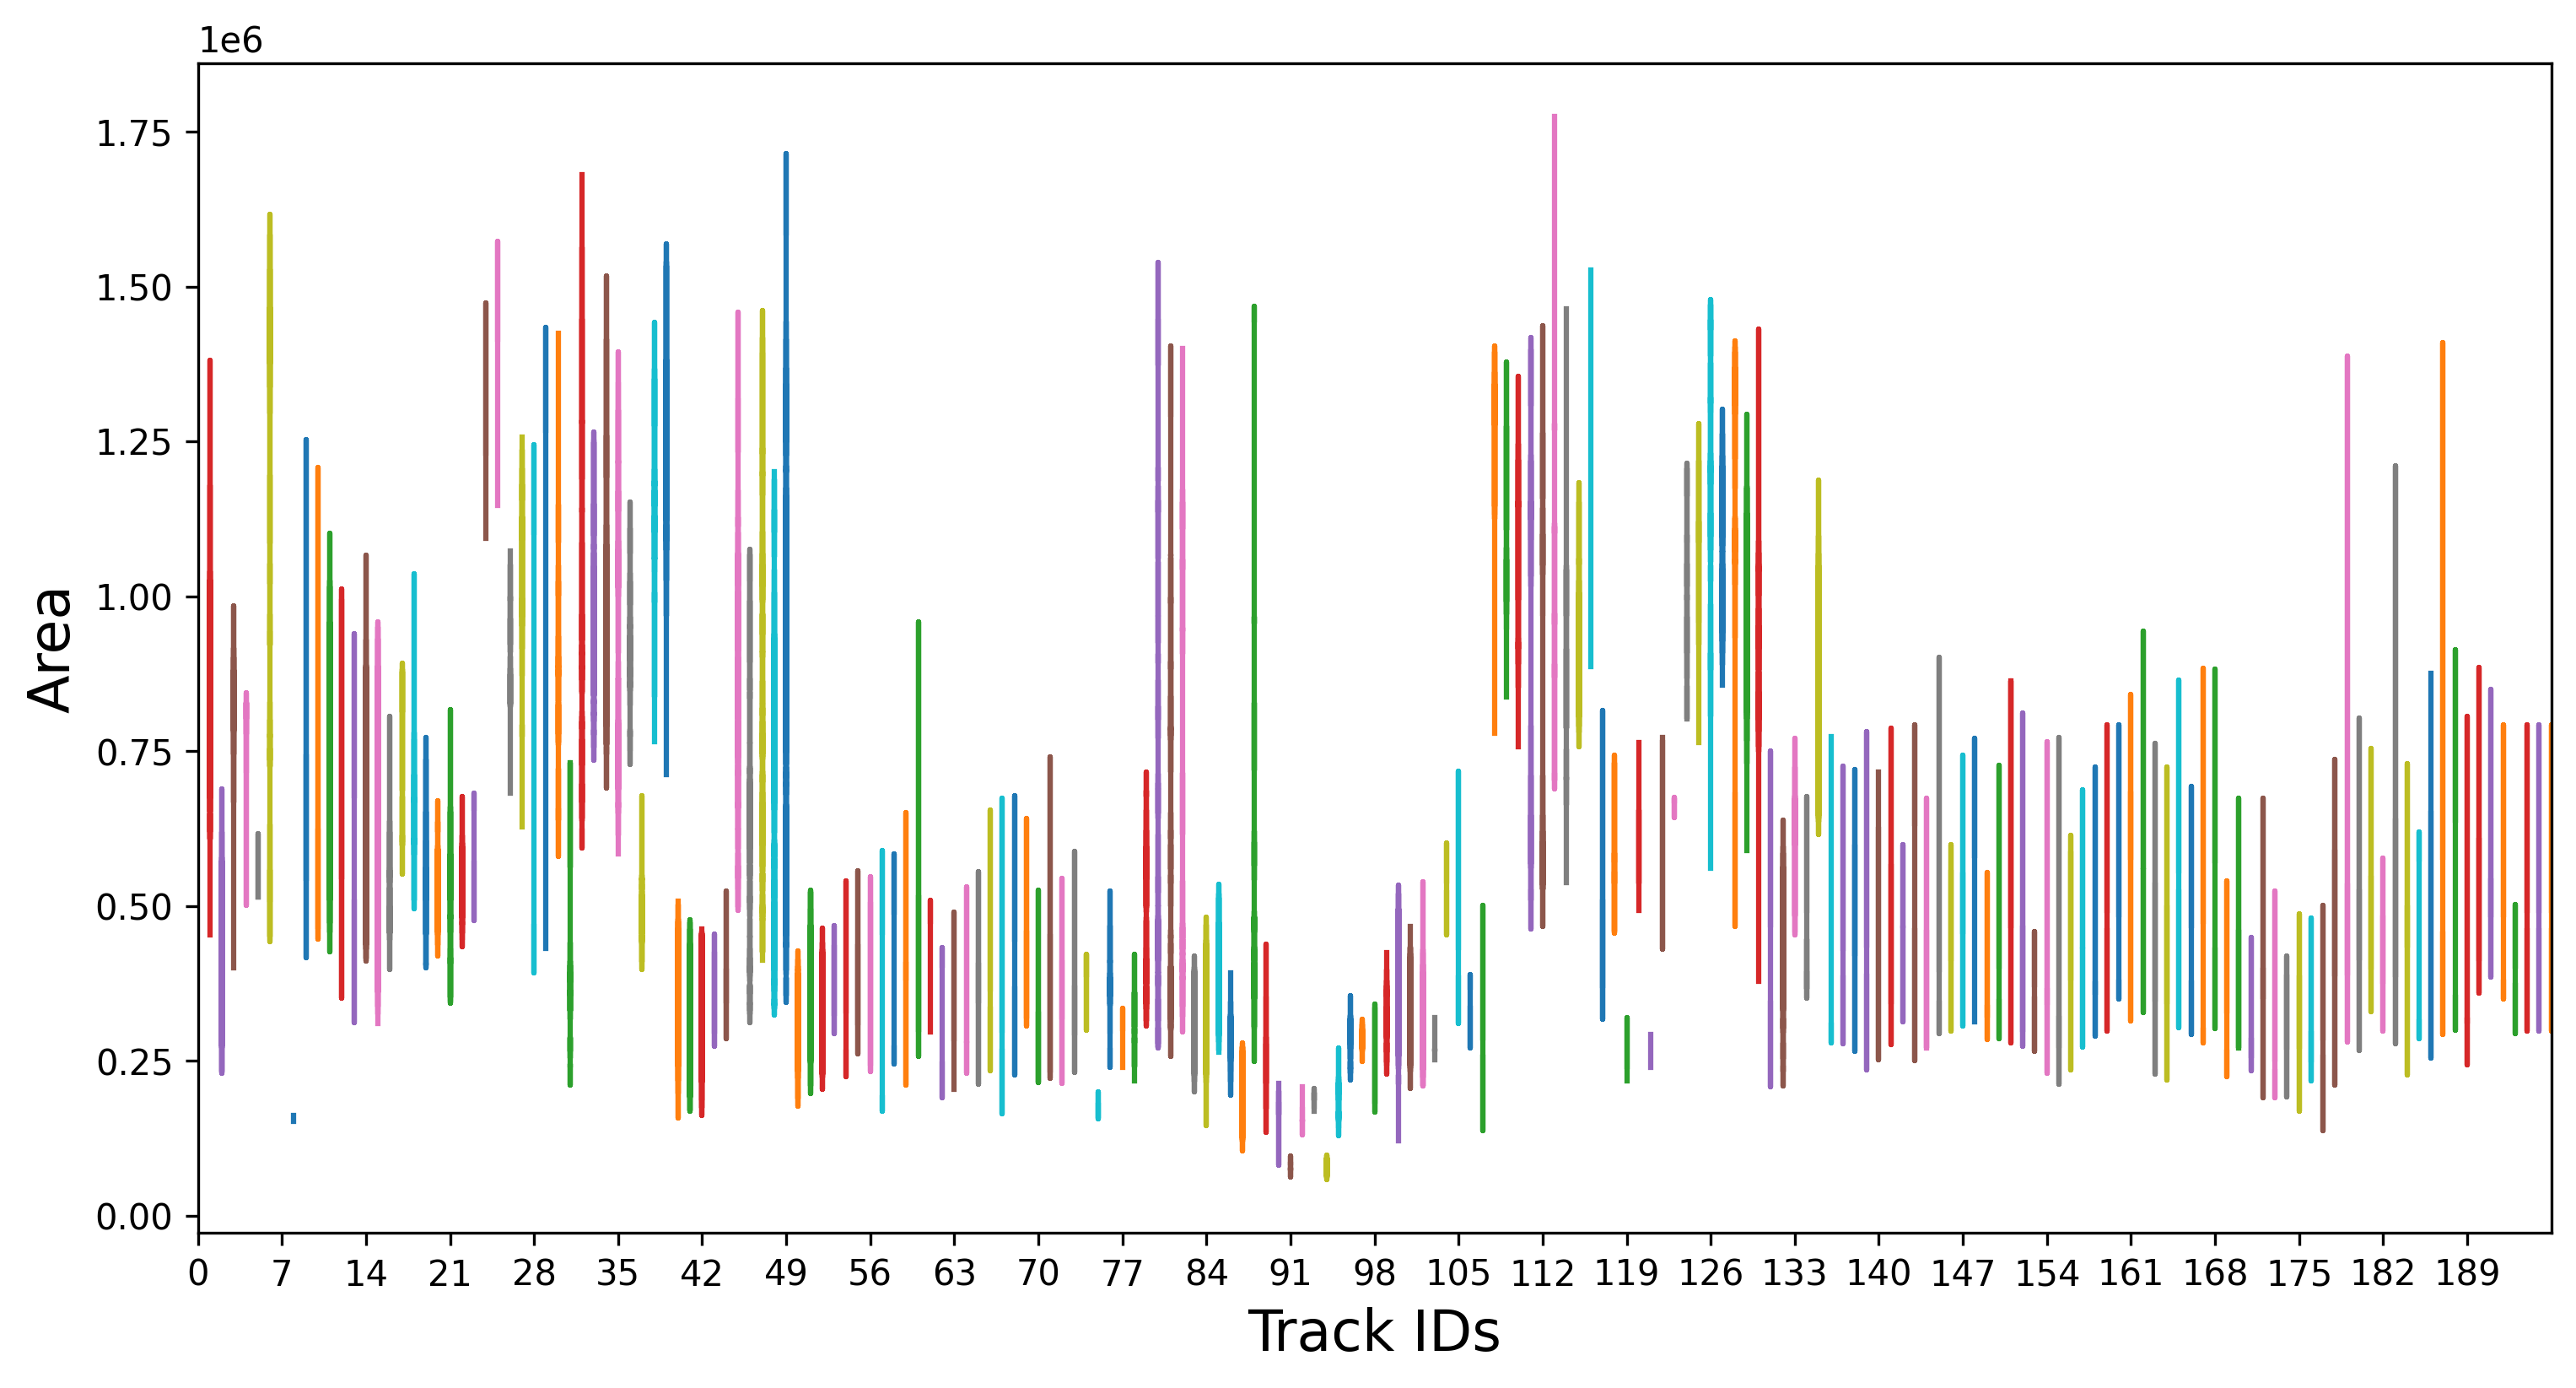

In [21]:
plot_trackID_area(trackid_area)

## BBox Distribution of Sequence

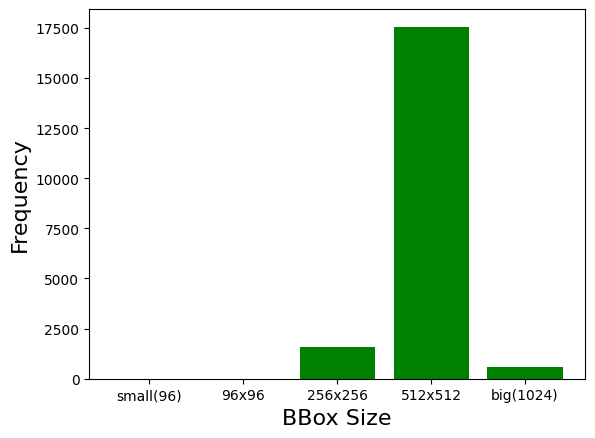

In [22]:
bbox_distribution(all_areas)